# 逻辑回归


## 人工神经元


现在进入核心内容：人工神经元！

下图展示了人工神经元的工作原理：

![人工神经元](./images/NeuroneArtificiel.png)

人工神经元接收一个输入向量 $\mathbf{x}=(x_1, x_2, ..., x_n)$。向量中的每个元素 $x_i$ 会乘以一个权重 $w_i$，然后将所有乘积相加并加上一个偏置 $b$。这个总和会经过一个称为**激活函数** $\phi$ 的函数处理。
输出结果为：$输出 = \phi(\sum_{i=0}^{n} w_i x_i  + b)$。
之所以称为人工神经元，是因为它模仿了[生物神经元](https://en.wikipedia.org/wiki/Artificial_neuron)的工作方式。


## 激活函数


**Heaviside 阶跃函数：** 最早的人工神经元（[感知器](https://fr.wikipedia.org/wiki/Perceptron)）使用阈值函数作为激活函数。该函数根据加权和与预定阈值进行决策（输出 0 或 1）。
$heaviside(x) = \left\{
    \begin{array}{ll}
        1 & \text{如果 } x > 0 \\
        0 & \text{否则}
    \end{array}
\right. \text{，其中 } x=\sum_{i=0}^{n} w_i x_i  + b$
这种激活函数适用于二分类问题，但不适用于多类别问题。此外，该函数不可导，因此难以使用梯度下降算法来优化神经元的权重 $w_i$。

近代的激活函数更适合通过梯度下降训练神经网络。首先，它们是可导的，因此可以应用梯度下降算法。其次，它们是非线性的，使得神经网络能够学习复杂的表示。此外，每种激活函数还有其特定的优势。

其中一种“近代”激活函数是 Sigmoid 函数，我们将在这里详细介绍：

**Sigmoid 函数：** Sigmoid 函数是一种特别有用的激活函数，因为它的输出可以类比为概率。该函数通过以下公式将输入值转换为 0 到 1 之间的值：
$sigmoid(x) = \frac{1}{1 + e^{-x}} \text{，其中 } x=\sum_{i=0}^{n} w_i x_i  + b$


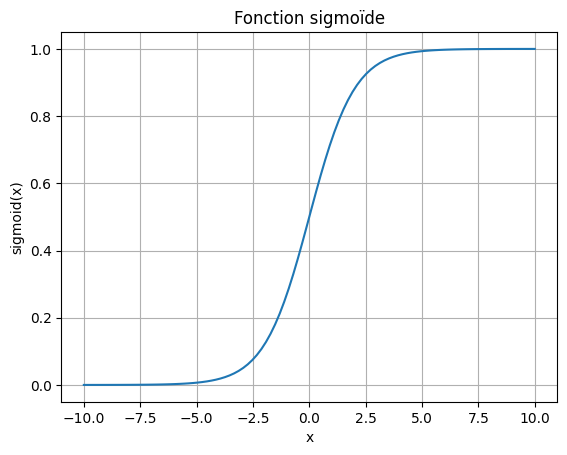

In [1]:
# Tracé de la fonction sigmoïde
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Fonction sigmoïde')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

该函数是可导的，其导数为：
$sigmoid'(x) = sigmoid(x) \cdot (1 - sigmoid(x))$
因此，当使用该激活函数时，我们可以对人工神经元应用梯度下降算法。

还有许多其他[激活函数](https://fr.wikipedia.org/wiki/Fonction_d%27activation)，每种都有其特定用途。我们将在后续课程中介绍它们（如 $Tanh$、$ReLU$、$Softmax$）。


## 应用


为了更好地理解逻辑回归，我们通过一个具体的例子来学习。

在这个例子中，我们将根据三个信息来判断一名学生是否能被其理想大学录取：入学考试成绩、前一年的平均成绩以及推荐信的质量。

虽然我们不知道学校录取或拒绝学生的具体计算方法，但我们拥有相关的数据和对应的录取决定。

输入信息的取值范围在 0 到 1 之间，1 表示最佳成绩。录取 = 1 表示被录取，录取 = 0 表示被拒绝。


In [2]:
from tabulate import tabulate

# Définition des données d'entraînement
values_train = [[0.7, 0.8, 0.1], [0.4, 0.9, 0.5], [0.2, 0.3, 0.9], [0.9, 0.9, 0.6]]
labels_train = [1, 0, 0, 1]

# Ajout des noms de colonnes
data = [['Examen', 'Moyenne', 'Motivation', 'Admis']]
data.extend([[values_train[i][0], values_train[i][1], values_train[i][2], labels_train[i]] for i in range(len(values_train))])

# Affichage du tableau
print(tabulate(data, headers="firstrow", tablefmt="fancy_grid"))

╒══════════╤═══════════╤══════════════╤═════════╕
│   Examen │   Moyenne │   Motivation │   Admis │
╞══════════╪═══════════╪══════════════╪═════════╡
│      0.7 │       0.8 │          0.1 │       1 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.4 │       0.9 │          0.5 │       0 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.2 │       0.3 │          0.9 │       0 │
├──────────┼───────────┼──────────────┼─────────┤
│      0.9 │       0.9 │          0.6 │       1 │
╘══════════╧═══════════╧══════════════╧═════════╛


在这个问题中，我们的目标是判断得分为 $[考试=0.8, 平均成绩=0.7, 动机=0.2]$ 和 $[考试=0.4, 平均成绩=0.5, 动机=0.9]$ 的学生是否被录取。


可以看出，$考试$、$平均成绩$ 和 $动机$ 对应于我们的输入 $x_i$。通过逻辑回归，我们的目标是找到与训练数据相符的最优权重 $w_i$。

为了简化，我们设定：
$x_0=考试$，$x_1=平均成绩$，$x_2=动机$，$y_{true}=录取$。


### 代价函数


在梯度下降的例子中，我们的目标是找到一个函数的最小值。梯度下降算法在这些场景中表现优异。对于我们的新问题，我们需要找到一个函数，当我们最小化该函数时，可以提高预测的准确性。

在二分类问题中，$y_{true}$ 的值为 1 表示学生被录取，0 表示未被录取。

我们的目标是预测学生是否被录取，即预测输出 $pred$。

在训练过程中，我们希望训练逻辑回归模型，使其预测值 $pred$ 接近 $y_{true}$。

为此，我们使用负对数似然函数，其表达式如下：
$\text{loss} = - \left( y_{\text{true}} \cdot \log(\text{pred}) + (1 - y_{\text{true}}) \cdot \log(1 - \text{pred}) \right)$

关于逻辑回归和负对数似然损失的更多细节，请参阅此[链接](https://blog.demir.io/understanding-logistic-regression-26802c0da856)。


重要的是理解该函数如何根据我们的预测 $pred$ 和标签 $y_{true}$ 变化。

我们以 $y_{true}=1$ 为例，分析两种情况：

如果 $pred=0.9$，即模型预测学生有 90% 的概率被录取（一个好的预测），那么：
$\text{loss} = - \left( 1.0 \cdot \log(0.9) + (1 - 1.0) \cdot \log(1 - 0.9) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9) + 0 \cdot \log(0.1) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.9) \right)$
$\text{loss} = 0.046$
损失值较小，说明这是一个好的预测。

如果 $pred=0.2$，即模型预测学生只有 20% 的概率被录取（一个不好的预测），那么：
$\text{loss} = - \left( 1.0 \cdot \log(0.2) + (1 - 1.0) \cdot \log(1 - 0.2) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2) + 0 \cdot \log(0.8) \right)$
$\text{loss} = - \left( 1.0 \cdot \log(0.2) \right)$
$\text{loss} = 0.70$
损失值较大，说明这是一个不好的预测。

对于 $y_{true}=0$ 的情况，当 $pred$ 接近 0 时损失值较小，当 $pred$ 接近 1 时损失值较大（可自行计算验证）。


### 导数计算


现在我们有一个需要最小化的函数，因此需要计算该函数关于每个权重 $w_0$、$w_1$、$w_2$ 和偏置 $b$ 的导数。

因此，我们需要计算 $\frac{\partial loss}{\partial w_0}$、$\frac{\partial loss}{\partial w_1}$、$\frac{\partial loss}{\partial w_2}$ 和 $\frac{\partial loss}{\partial b}$。

对于权重 $w_0$、$w_1$ 和 $w_2$，导数的计算方式是相同的。

使用链式法则，对于 $w_0$，我们有：
$\frac{\partial loss}{\partial w_0} = \frac{\partial loss}{\partial pred} \cdot \frac{\partial pred}{\partial w_0}$

需要注意的是，我们的预测 $pred$ 是逻辑回归的输出，使用 Sigmoid 激活函数。

对于第一项，损失关于 $pred$ 的导数为：
$\frac{\partial loss}{\partial pred} = -(\frac{y_{true}}{pred} - \frac{1-y_{true}}{1-pred})$
这里不详细展开计算过程，但你可以自行验证。

对于第二项，$pred$ 关于 $w_0$ 的导数为：
$\frac{\partial pred}{\partial w_0} = pred \cdot (1-pred) \cdot x_0$

结合这两项，我们得到：
$\frac{\partial loss}{\partial w_0} = -(\frac{y_{true}}{pred} - \frac{1-y_{true}}{1-pred}) \cdot pred \cdot (1-pred) \cdot x_0$

经过简化（魔法般的简化），得到：
$\frac{\partial loss}{\partial w_0} = (pred-y_{true}) \cdot x_0$

不详细展开计算，我们同样可以得到：
$\frac{\partial loss}{\partial b} = pred-y_{true}$


### 逻辑回归


现在我们已经具备了所有必要的元素，
我们可以用 Python 定义逻辑回归函数：


In [3]:
# Notre classe de regression logistique
class logistic_regression():
  def __init__(self) -> None:
    self.w0=np.random.randn()
    self.w1=np.random.randn()
    self.w2=np.random.randn()
    self.b=0
  def __call__(self,x0,x1,x2):
    # Somme pondérée et ajout du biais
    pond=self.w0*x0+self.w1*x1+self.w2*x2+self.b
    # Application de la sigmoïde
    pred=sigmoid(pond)
    return pred
    
def loss(y_true, y_pred):
  # Calcul du loss (log vraisemblance négative)
  loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss
    

def update_weights(model,pred, x0, x1, x2, y_true, learning_rate):
       
  # On calcule les dérivées en fonction des poids et du biais 
  dL_dw0 = (pred - y_true) * x0
  dL_dw1 = (pred - y_true) * x1
  dL_dw2 = (pred - y_true) * x2
  dL_db = pred - y_true
      
  # On modifie les paramètres pour réduire le loss 
  # La modification des poids dépend du learning rate, du signe de la dérivée et de la valeur de la dérivée
  model.w0 -= learning_rate * dL_dw0
  model.w1 -= learning_rate * dL_dw1
  model.w2 -= learning_rate * dL_dw2
  model.b -= learning_rate * dL_db

In [4]:

# Initialisation du modèle et des hyperparamètres
learning_rate = 0.01
epochs = 1000 # le nombre d'itérations d'entrainement
model = logistic_regression()

在训练模型之前，我们先测试一下对两名学生录取结果的预测。


In [5]:
values_test=[[0.8,0.7,0.7],[0.4,0.5,0.9]]
for value in values_test:
  x0,x1,x2=value
  pred = model(x0, x1, x2)
  print("L'élève avec Examen = "+str(x0)+ ", Moyenne = "+str(x1)+" et Motivation = "+str(x2)+ " a "+str(round(pred*100)) + "% de chance d'être admis")

L'élève avec Examen = 0.8, Moyenne = 0.7 et Motivation = 0.7 a 60% de chance d'être admis
L'élève avec Examen = 0.4, Moyenne = 0.5 et Motivation = 0.9 a 59% de chance d'être admis


可以看到模型非常不确定，给出的概率是随机的，这是因为模型的权重是随机初始化的。

现在，我们在训练数据上训练模型。


In [9]:
# Entraînement
for epoch in range(epochs):
  # Mise à jour des poids pour chaque exemple
  total_loss = 0
  for (x0, x1, x2), y_true in zip(values_train, labels_train):
    pred = model(x0, x1, x2)
    update_weights(model,pred, x0, x1, x2, y_true, learning_rate)
    total_loss += loss(y_true, pred)

  avg_loss = total_loss / len(labels_train)
  
  # Affichage de la perte pour suivre la progression de l'entraînement
  if ((epoch + 1) % 5000 == 0) or (epoch==0):
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}")

Epoch 1/40000, Loss: 0.01468091027998586
Epoch 5000/40000, Loss: 0.013032955086147595
Epoch 10000/40000, Loss: 0.011715352279809266
Epoch 15000/40000, Loss: 0.010638348324912276
Epoch 20000/40000, Loss: 0.009741762611763436
Epoch 25000/40000, Loss: 0.008983896958517028
Epoch 30000/40000, Loss: 0.008334957514714105
Epoch 35000/40000, Loss: 0.007773096000082178
Epoch 40000/40000, Loss: 0.007281930357182074


In [10]:
print(model.w0, model.w1, model.w2, model.b)

for value in values_test:
  x0,x1,x2=value
  pred = model(x0, x1, x2)
  print("L'élève avec Examen = "+str(x0)+ ", Moyenne = "+str(x1)+" et Motivation = "+str(x2)+ " a "+str(round(pred*100)) + "% de chance d'être admis")

19.464301071981186 -3.27230109363944 -8.244865180820856 -4.903197398150705
L'élève avec Examen = 0.8, Moyenne = 0.7 et Motivation = 0.7 a 93% de chance d'être admis
L'élève avec Examen = 0.4, Moyenne = 0.5 et Motivation = 0.9 a 0% de chance d'être admis


可以看到，现在我们的模型对其预测更加自信，并且给出了与训练数据相符的预测结果。
